In [1]:
import numpy as np
from scipy import stats
import statsmodels.api as sm

## Hypothesis Testing for single mean

### Z-Test (When the population variance in known)

In [8]:
# One tail hypothesis test
# H0: mean <= 8000
# Ha: mean > 8000

n = 36
x_bar = 8120
mu = 8000
sigma = 500

z = (x_bar - mu)/(sigma/np.sqrt(n))

pval = 1 - stats.norm.cdf(z)
pval

0.07493369953432705

### T-Test (When polulation variance is unknown)

In [10]:
data = np.array([3.3, 1.3, 2.8, 4.6, 5.5, 3.4, 5.0, 5.1, 3.1, 4.5, 6.0, 5.8])

# H0: mu >= 5
# H1: mu < 5 (Two tail test)

statistic, pval = stats.ttest_1samp(data, popmean=5.0, alternative='less')
statistic, pval

(-1.9498667128857294, 0.0385675495950937)

> Hypothesis test for proportion of a population

In [11]:
# H0: p <= 0.34
# Ha: p > 0.34

sm.stats.proportions_ztest(count=96, nobs=240, value=0.34, alternative='larger')

(1.8973665961010278, 0.028889785561798602)

## Hypothesis Test Comparing Two Populations

> 1. Comparing Two Means with <br>
    • Independent Samples <br>
    • Known Population Standard Deviations

In [14]:
federal_jobs = np.random.randint(60000, 80000, size=(36,))
private_jobs = np.random.randint(54000, 70000, size=(33,))

In [17]:
sm.stats.ztest(federal_jobs, private_jobs, value=0)

(8.329427351976372, 8.123432755839579e-17)

> T-test (Assuming Equal Population Variance)

In [18]:
rats1 = np.array([1.90,2.03,3.38,3.19,2.32,2.29,1.92,3.31,3.25,
                  1.92,2.12,2.20,2.98,2.15,2.05,2.99,3.37,3.22,2.05,3.35])
rats2 = np.array([1.47,1.60,1.64,1.62,1.70,1.59,1.70,3.39,1.60,
                  1.72,1.63,1.71,3.20,1.60,1.57,1.68,3.39,3.36,
                  1.44,1.67,3.33,3.42,3.37,1.53,1.57])

stats.ttest_ind(rats1, rats2, alternative='greater')

Ttest_indResult(statistic=2.3174802842828366, pvalue=0.012652171735493113)

> T-test (Assuming Unequal Population Variance)

In [19]:
pop1 = np.array([24.2,26.1,28.8,30.1,24.6,29.1,28.2,27.4,28.3,27.9])
pop2 = np.array([23,21.7,32.7,20.7,31.1,19.6,26.5,21.1,20.6,27.2,26.8])

stats.ttest_ind(pop1,pop2,equal_var=False)

Ttest_indResult(statistic=1.904526432457668, pvalue=0.07785107327039296)

> Using the difference other than zero

In [20]:
bill_1 = np.array([55.8,47.3,55.2,51.5,52.3,39.2,41.3,35.7,44.7,
                   50.7,49.3,44.3,44.7,48.5,38.3,46.6,39.6,46.3,
                   47.6,39.7,45.2,39.9,52.4])
bill_2 = np.array([41.3,45.7,45.6,30.8,29.4,37.9,43.5,42.7,37.6,
                   38.1,41.8,39.9,34.8,39.7,40.8,35.2,38.5,32.8,49.7])

sm.stats.ttest_ind(bill_1, bill_2, alternative='larger', value=3) #ttest, pval, df

(2.1752427052209256, 0.017790494468356198, 40.0)

> Dependent Samples (Matched-pair differences)

In [23]:
end = np.array([64,54,126,97,37,74,117,90,81])
middle = np.array([72,41,100,62,40,60,122,62,78])

In [25]:
stats.ttest_rel(end, middle,alternative='greater')

Ttest_relResult(statistic=2.1833503263322047, pvalue=0.030272709245538383)

### Comparing Two Population Proportions with Independent Samples

In [28]:
successes = np.array([167, 799])
totals = np.array([1207, 4963])

sm.stats.proportions_ztest(count=successes, nobs=totals, alternative='smaller')

(-1.9405713046893944, 0.02615514874735163)

## ANOVA

### One Way ANOVA

> - ANOVA Assumptions <br>
    - Residuals (experimental error) are normally distributed (Shapiro-Wilks Test) <br>
    - Homogeneity of variances (variances are equal between treatment groups) (Levene’s or Bartlett’s Test) <br>
    - Observations are sampled independently from each other

In [2]:
# Individual Satisfaction Scores for Four Smartphones
iphone = np.array([87,85,78,82])
galaxys8 = np.array([71,82,75,80])
motog6 = np.array([66, 74, 79])
lg = np.array([65,69,67,63])

In [3]:
stats.f_oneway(iphone,galaxys8,motog6,lg)

F_onewayResult(statistic=9.859980334316617, pvalue=0.001887232383275623)

In [4]:
import pandas as pd

In [10]:
df1 = pd.DataFrame(iphone, index=['iphone']*4, columns=['score'])
df2 = pd.DataFrame(galaxys8, index=['galaxys8']*4, columns=['score'])
df3 = pd.DataFrame(motog6, index=['motog6']*3, columns=['score'])
df4 = pd.DataFrame(lg, index=['lg']*4, columns=['score'])

In [17]:
df = pd.concat([df1,df2,df3,df4], axis=0).reset_index()
df

,index,score
0,iphone,87
1,iphone,85
2,iphone,78
3,iphone,82
4,galaxys8,71
5,galaxys8,82
6,galaxys8,75
7,galaxys8,80
8,motog6,66
9,motog6,74


In [18]:
model = sm.formula.ols('score ~ C(index)', data=df).fit()

In [28]:
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(index),607.733333,3.0,9.85998,0.001887
Residual,226.000000,11.0,NaN,NaN


In [34]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:                     9.860
Date:                Fri, 04 Jun 2021   Prob (F-statistic):            0.00189
Time:                        10:09:21   Log-Likelihood:                -41.628
No. Observations:                  15   AIC:                             91.26
Df Residuals:                      11   BIC:                             94.09
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             77.0000      2

C:\Users\Subhash\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [32]:
## Checking residuals normality --> Assumption 1.

# H0: The Shapiro-Wilk test tests the null hypothesis that the
#     data was drawn from a normal distribution.

stats.shapiro(model.resid) # this test confirms that residuals are normality distributed

ShapiroResult(statistic=0.9602561593055725, pvalue=0.69684898853302)

In [33]:
## Checking Homoginity of variance --> Assumption 2.

# H0: Bartlett's test tests the null hypothesis that all input samples
#     are from populations with equal variances.

stats.bartlett(iphone,galaxys8,motog6,lg)

BartlettResult(statistic=1.9271115785294324, pvalue=0.5876719160930977)

C:\Users\Subhash\anaconda3\lib\site-packages\statsmodels\sandbox\stats\multicomp.py:775: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.insert(self.groupsunique.astype(str), 0, ''))


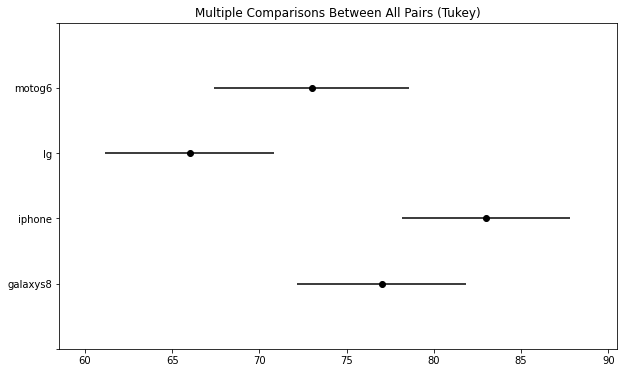

In [39]:
### Tukey-Kramer Multiple comparison test
tukey = sm.stats.multicomp.pairwise_tukeyhsd(endog=df['score'], 
                                             groups=df['index'], alpha=0.05)

# H0: mean is same for that group
# H1: mean is not same

tukey.plot_simultaneous();

In [40]:
tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
galaxys8,iphone,6.0,0.2938,-3.647,15.647,False
galaxys8,lg,-11.0,0.0247,-20.647,-1.353,True
galaxys8,motog6,-4.0,0.6529,-14.4199,6.4199,False
iphone,lg,-17.0,0.0012,-26.647,-7.353,True
iphone,motog6,-10.0,0.0611,-20.4199,0.4199,False
lg,motog6,7.0,0.2379,-3.4199,17.4199,False


### Two-way Anova Test

In [41]:
df = pd.read_csv("https://reneshbedre.github.io/assets/posts/anova/twowayanova.txt", sep="\t")
df.head()

,Genotype,1_year,2_year,3_year
0,A,1.53,4.08,6.69
1,A,1.83,3.84,5.97
2,A,1.38,3.96,6.33
3,B,3.60,5.70,8.55
4,B,2.94,5.07,7.95


In [42]:
# From two-way ANOVA, we can tests three hypotheses 
# 1) effect of genotype on yield 
# 2) effect of time (years) on yield, 
# and 3) effect of genotype and time (years) interactions on yield

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Genotype  18 non-null     object 
 1   1_year    18 non-null     float64
 2   2_year    18 non-null     float64
 3   3_year    18 non-null     float64
dtypes: float64(3), object(1)
memory usage: 704.0+ bytes


In [45]:
dataset = pd.melt(df,id_vars=['Genotype'],value_vars=['1_year','2_year','3_year'], var_name=['years'])
dataset

,Genotype,years,value
0,A,1_year,1.53
1,A,1_year,1.83
2,A,1_year,1.38
3,B,1_year,3.60
4,B,1_year,2.94
5,B,1_year,4.02
6,C,1_year,3.99
7,C,1_year,3.30
8,C,1_year,4.41
9,D,1_year,3.75


In [46]:
model2 = sm.formula.ols('value ~ C(Genotype)+C(years)+C(Genotype):C(years)', data=dataset).fit()

In [47]:
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     58.33
Date:                Fri, 04 Jun 2021   Prob (F-statistic):           4.29e-21
Time:                        10:54:24   Log-Likelihood:                -37.909
No. Observations:                  54   AIC:                             111.8
Df Residuals:                      36   BIC:                             147.6
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

In [52]:
sm.stats.anova_lm(model2, typ=2)

,sum_sq,df,F,PR(>F)
C(Genotype),58.551733,5.0,32.748581,1.931655e-12
C(years),278.925633,2.0,390.014868,4.006243e-25
C(Genotype):C(years),17.122967,10.0,4.788525,2.230094e-04
Residual,12.873000,36.0,NaN,NaN


In [56]:
from bioinfokit.analys import stat

res = stat()

In [58]:
formula = 'value ~ C(Genotype)+C(years)+C(Genotype):C(years)'
res.tukey_hsd(df=dataset,res_var='value',xfac_var='Genotype', anova_model=formula)
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,A,B,2.040000,1.191912,2.888088,10.234409,0.001000
1,A,C,2.733333,1.885245,3.581421,13.712771,0.001000
2,A,D,2.560000,1.711912,3.408088,12.843180,0.001000
3,A,E,0.720000,-0.128088,1.568088,3.612145,0.135306
4,A,F,2.573333,1.725245,3.421421,12.910072,0.001000
5,B,C,0.693333,-0.154755,1.541421,3.478361,0.163609
6,B,D,0.520000,-0.328088,1.368088,2.608771,0.453066
7,B,E,1.320000,0.471912,2.168088,6.622265,0.001000
8,B,F,0.533333,-0.314755,1.381421,2.675663,0.425189
9,C,D,0.173333,-0.674755,1.021421,0.869590,0.900000


In [59]:
res.tukey_hsd(df=dataset,res_var='value',xfac_var='years', anova_model=formula)
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,1_year,2_year,2.146667,1.659513,2.633821,15.230432,0.001
1,1_year,3_year,5.521667,5.034513,6.008821,39.175794,0.001
2,2_year,3_year,3.375000,2.887846,3.862154,23.945361,0.001


In [60]:
res.tukey_hsd(df=dataset,res_var='value',xfac_var=['Genotype','years'], anova_model=formula)
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,"(A, 1_year)","(A, 2_year)",2.38,0.548861,4.211139,6.893646,0.002439
1,"(A, 1_year)","(A, 3_year)",4.75,2.918861,6.581139,13.758326,0.001000
2,"(A, 1_year)","(B, 1_year)",1.94,0.108861,3.771139,5.619190,0.028673
3,"(A, 1_year)","(B, 2_year)",4.41,2.578861,6.241139,12.773520,0.001000
4,"(A, 1_year)","(B, 3_year)",6.90,5.068861,8.731139,19.985779,0.001000
...,...,...,...,...,...,...,...
148,"(E, 3_year)","(F, 2_year)",1.68,-0.151139,3.511139,4.866103,0.102966
149,"(E, 3_year)","(F, 3_year)",3.05,1.218861,4.881139,8.834294,0.001000
150,"(F, 1_year)","(F, 2_year)",0.74,-1.091139,2.571139,2.143402,0.900000
151,"(F, 1_year)","(F, 3_year)",5.47,3.638861,7.301139,15.843799,0.001000
